# SENTIMENT ANALYSIS

In [15]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
from wordcloud import STOPWORDS
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import string

In [4]:
# Load the Datset
data = pd.read_csv('US.csv')

# Display the first few rows of the dataset for initial inspection
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Preprocessing the Data

In [7]:
# Check for class imbalance
print("Class distribution:")
print(data['airline_sentiment'].value_counts())

Class distribution:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [8]:
# Check for Missing Data
missing_data = data.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [9]:
# Drop columns with excessive missing values or irrelevant information
columns_to_drop = ['negativereason_gold', 'airline_sentiment_gold', 'tweet_coord']
data.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Impute or drop rows with missing values in critical columns
data = data.dropna(subset=['airline_sentiment_confidence'])

In [11]:
# 2. Convert Data Types
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

# Sentiment Analysis

C:\Users\Touseef Iqbal\AppData\Local\Temp\ipykernel_11256\3839828265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='airline_sentiment', palette='viridis')


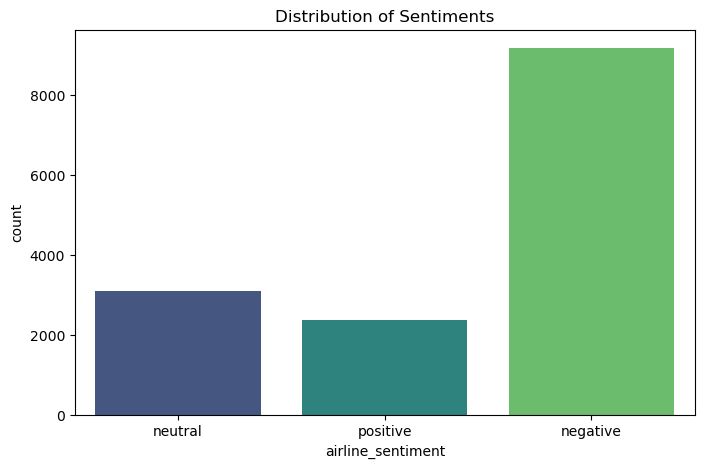

In [16]:
# Distribution of Sentiments
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='airline_sentiment', palette='viridis')
plt.title("Distribution of Sentiments")
plt.show()

C:\Users\Touseef Iqbal\AppData\Local\Temp\ipykernel_11256\2441114952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='airline', order=data['airline'].value_counts().index, palette='viridis')


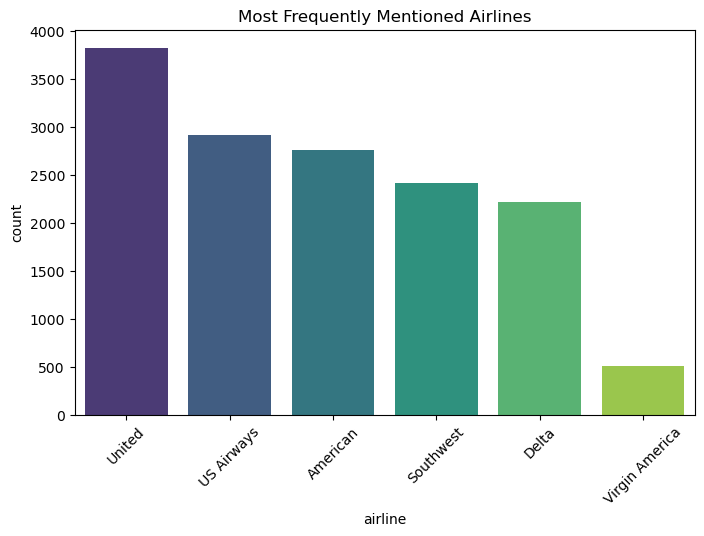

In [17]:
# Most Frequently Mentioned Airlines
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='airline', order=data['airline'].value_counts().index, palette='viridis')
plt.title("Most Frequently Mentioned Airlines")
plt.xticks(rotation=45)
plt.show()

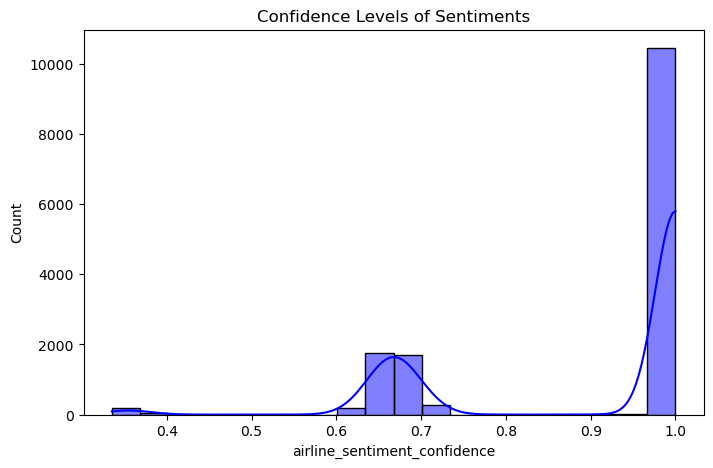

In [18]:
# Sentiment Confidence Levels
plt.figure(figsize=(8, 5))
sns.histplot(data['airline_sentiment_confidence'], kde=True, bins=20, color='blue')
plt.title("Confidence Levels of Sentiments")
plt.show()

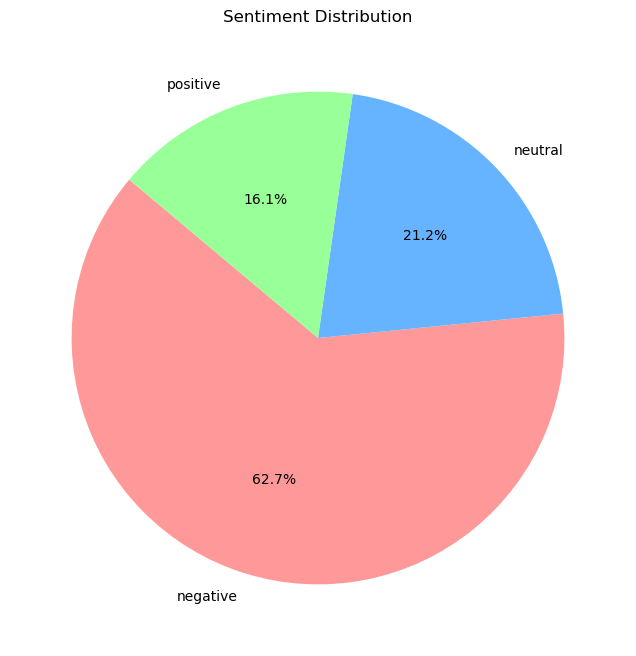

In [19]:
# Pie chart for sentiment distribution
sentiment_counts = data['airline_sentiment'].value_counts()
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999','#66b3ff','#99ff99']
)
plt.title('Sentiment Distribution')
plt.show()

# Word Cloud

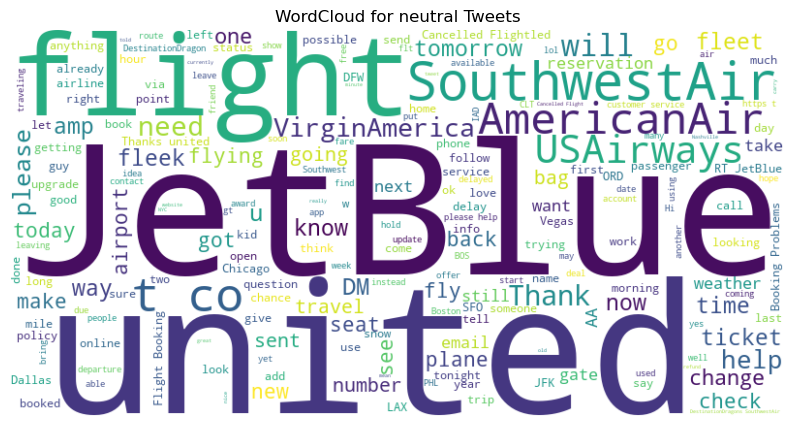

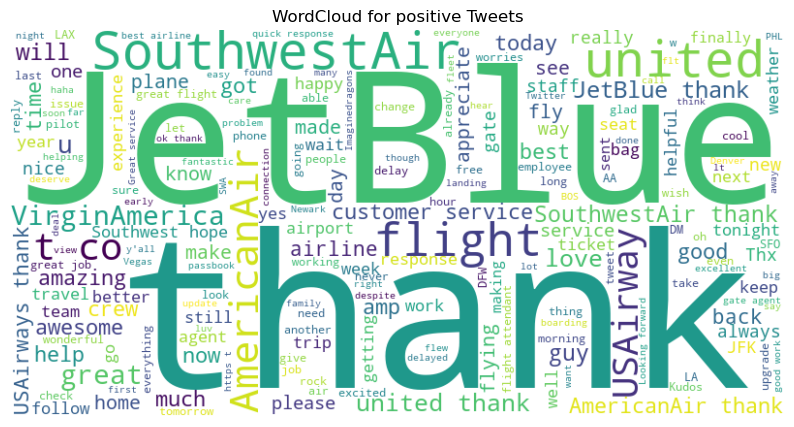

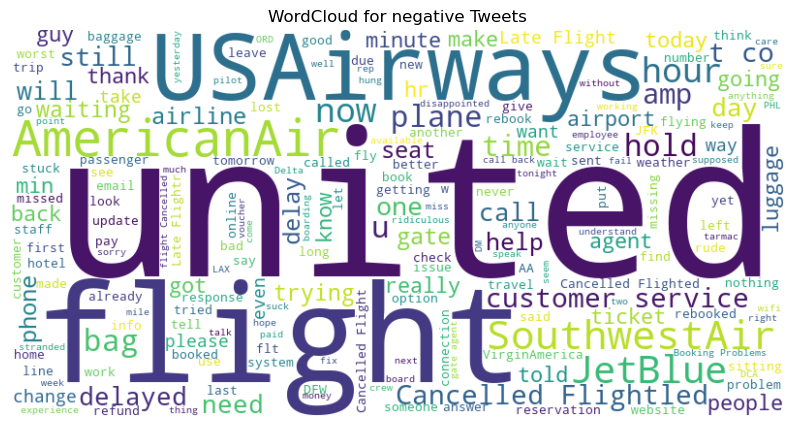

In [20]:
# WordCloud for Frequent Words in Tweets
for sentiment in data['airline_sentiment'].unique():
    sentiment_text = " ".join(data[data['airline_sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()

C:\Users\Touseef Iqbal\AppData\Local\Temp\ipykernel_11256\4212576334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='airline_sentiment', y='airline_sentiment_confidence', palette='Set2')


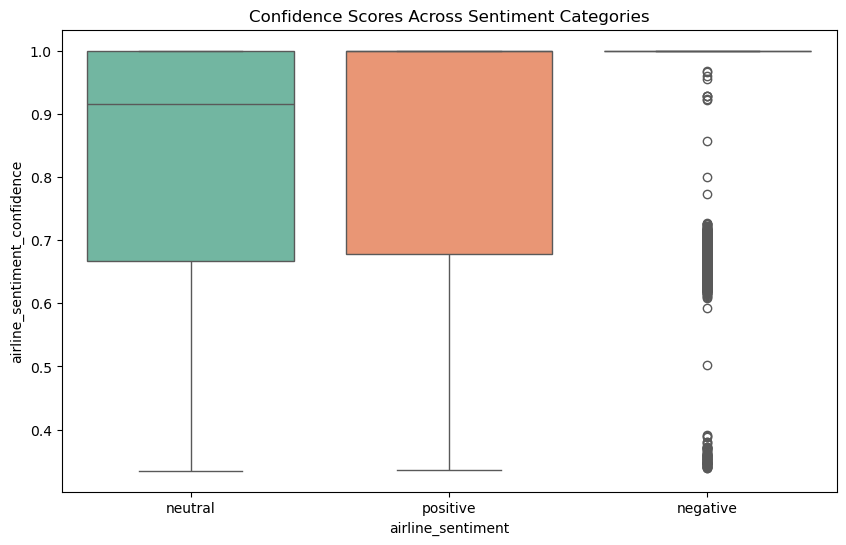

In [21]:
# Sentiment Confidence Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='airline_sentiment', y='airline_sentiment_confidence', palette='Set2')
plt.title("Confidence Scores Across Sentiment Categories")
plt.show()

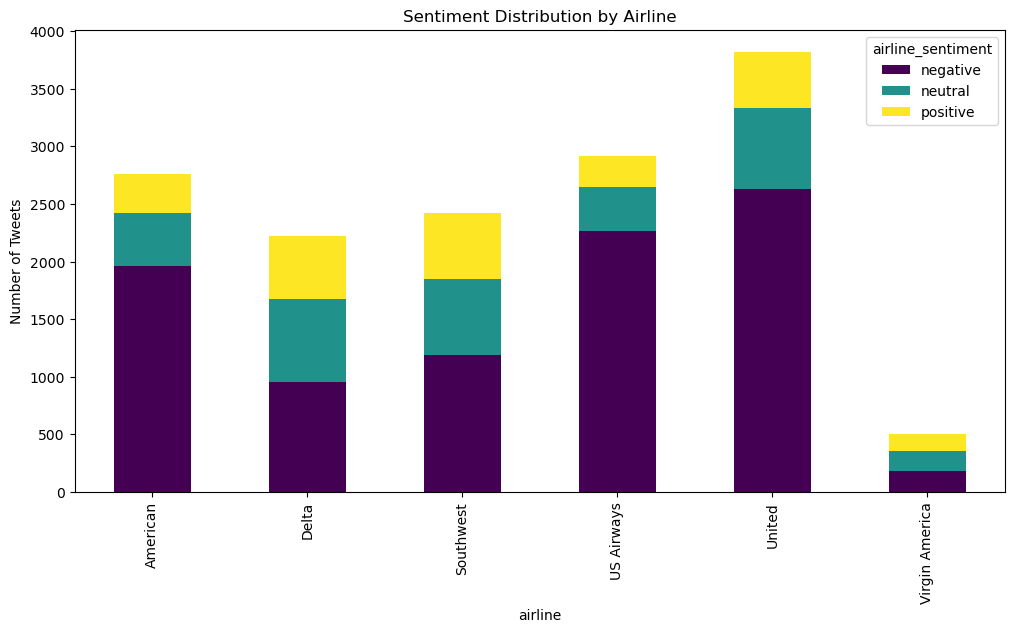

In [22]:
# Sentiment by Airline
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
sentiment_by_airline.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Sentiment Distribution by Airline")
plt.ylabel("Number of Tweets")
plt.show()

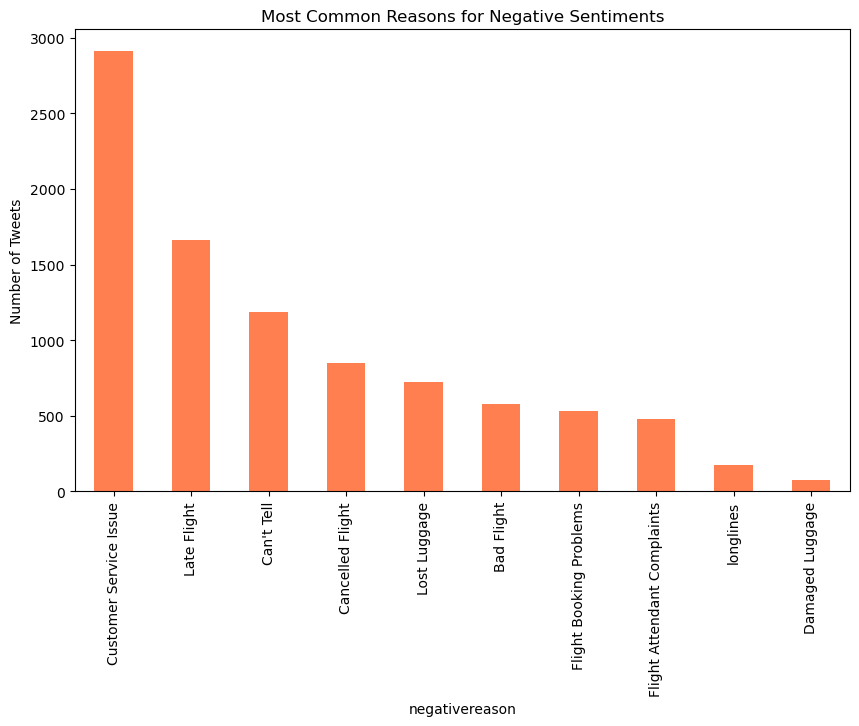

In [23]:
# Analyze Negative Sentiment Reasons
negative_reasons = data['negativereason'].dropna()
reason_counts = negative_reasons.value_counts()
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar', color='coral')
plt.title("Most Common Reasons for Negative Sentiments")
plt.ylabel("Number of Tweets")
plt.show()

In [24]:
# Text Preprocessing
def preprocess_text(text):
    # Remove URLs, mentions, and special characters
    text = re.sub(r"http\S+|@\S+|[^a-zA-Z\s]", '', text)
    text = text.lower()
    return text
data['cleaned_text'] = data['text'].apply(preprocess_text)

C:\Users\Touseef Iqbal\AppData\Local\Temp\ipykernel_11256\1648141995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


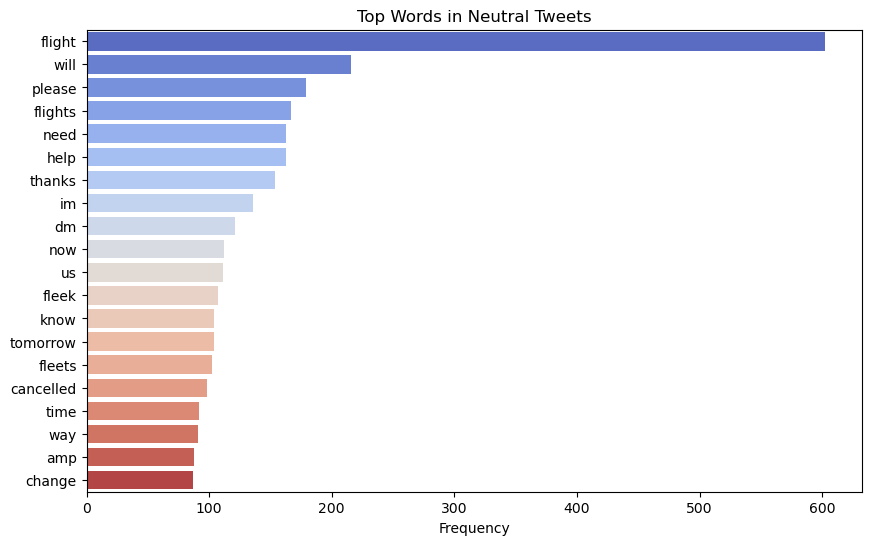

C:\Users\Touseef Iqbal\AppData\Local\Temp\ipykernel_11256\1648141995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


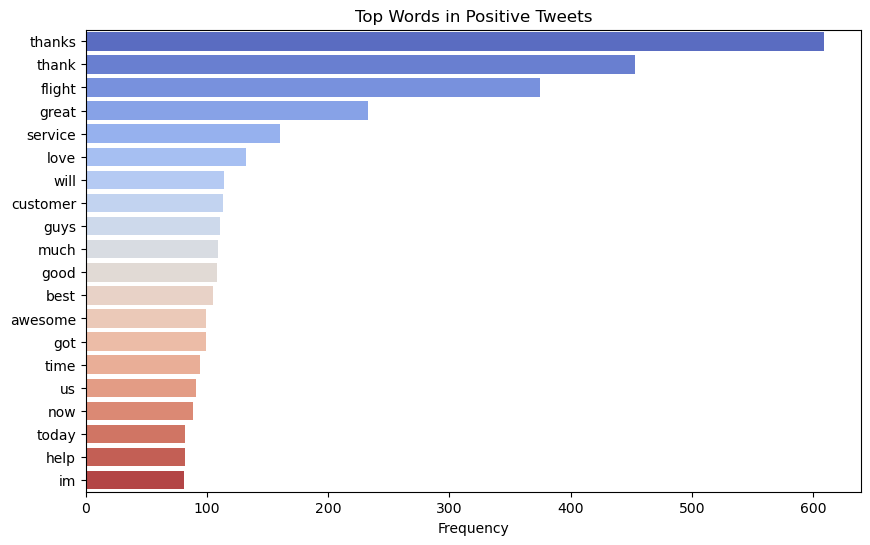

C:\Users\Touseef Iqbal\AppData\Local\Temp\ipykernel_11256\1648141995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


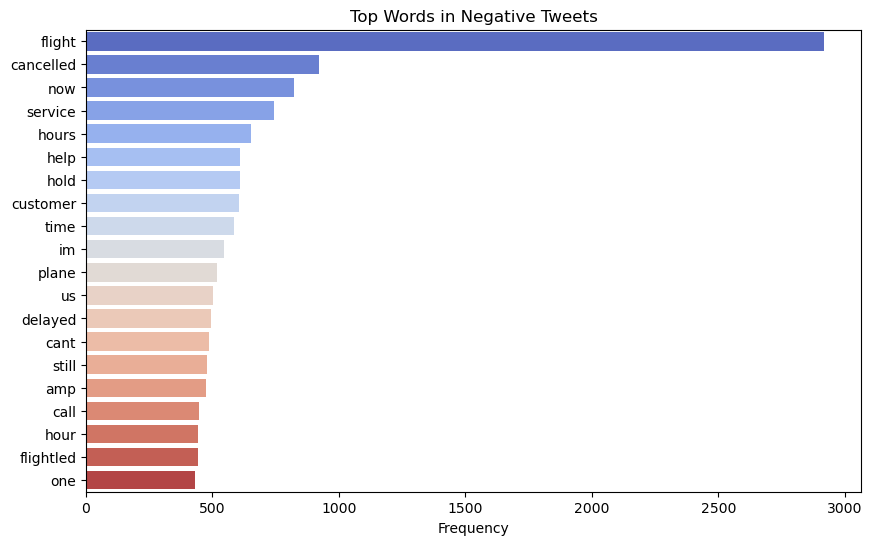

In [25]:
# 5. Generate Word Frequencies for Each Sentiment
def get_top_words(sentiment, n=20):
    all_words = " ".join(data[data['airline_sentiment'] == sentiment]['cleaned_text']).split()
    stop_words = set(STOPWORDS)
    filtered_words = [word for word in all_words if word not in stop_words]
    most_common = Counter(filtered_words).most_common(n)
    return most_common

for sentiment in data['airline_sentiment'].unique():
    top_words = get_top_words(sentiment)
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
    plt.title(f"Top Words in {sentiment.capitalize()} Tweets")
    plt.xlabel("Frequency")
    plt.show()

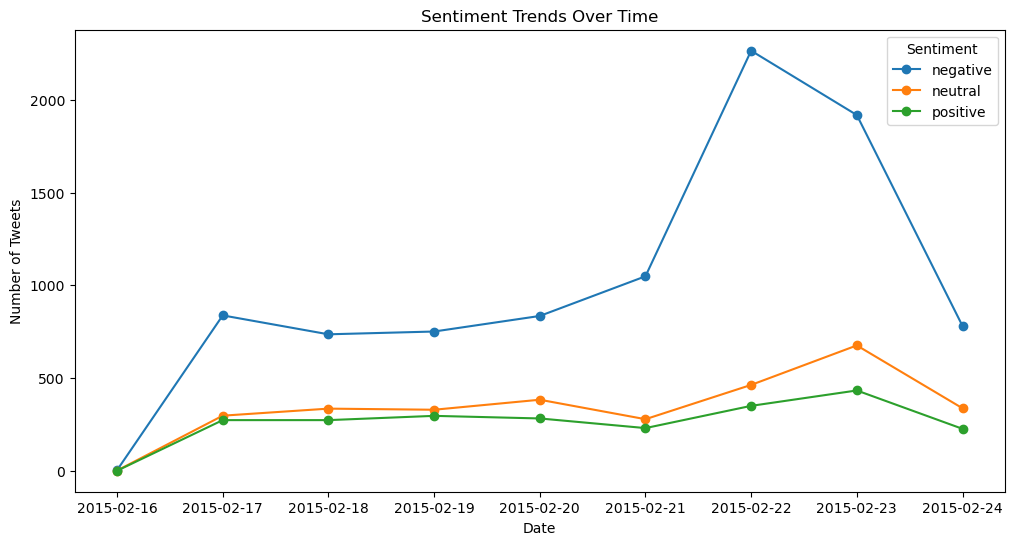

In [26]:
# Sentiment Trends Over Time
data['tweet_date'] = data['tweet_created'].dt.date
sentiment_trends = data.groupby(['tweet_date', 'airline_sentiment']).size().unstack(fill_value=0)

sentiment_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Sentiment Trends Over Time")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.legend(title="Sentiment")
plt.show()

In [44]:
top_words

[('flight', 2918),
 ('cancelled', 920),
 ('now', 823),
 ('service', 742),
 ('hours', 653),
 ('help', 610),
 ('hold', 608),
 ('customer', 604),
 ('time', 584),
 ('im', 547),
 ('plane', 517),
 ('us', 504),
 ('delayed', 493),
 ('cant', 486),
 ('still', 478),
 ('amp', 474),
 ('call', 448),
 ('hour', 444),
 ('flightled', 442),
 ('one', 433)]

# Training Classification Models

In [46]:
# Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(data['cleaned_text'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,12521,12522,12523,12524,12525,12526,12527,12528,12529,12530
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Train a Classification Model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Defining the target Column
y = data['airline_sentiment']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Traininf a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Making predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [42]:
# Display results
print(accuracy) 
print(report)

0.7851775956284153
              precision    recall  f1-score   support

    negative       0.80      0.94      0.87      1889
     neutral       0.67      0.42      0.52       580
    positive       0.79      0.59      0.68       459

    accuracy                           0.79      2928
   macro avg       0.75      0.65      0.69      2928
weighted avg       0.77      0.79      0.77      2928



<Figure size 800x800 with 0 Axes>

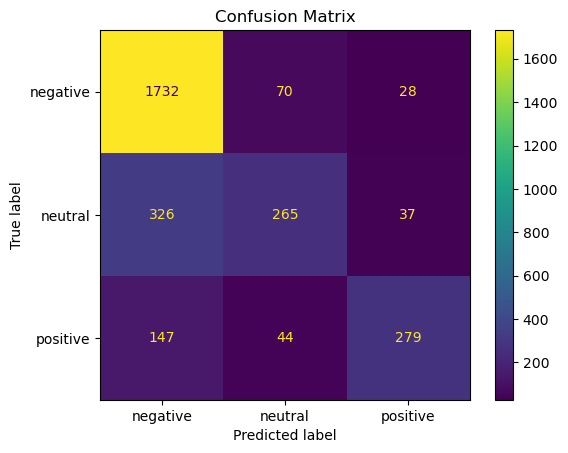

In [37]:
# Plotting Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Step 2: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
plt.figure(figsize=(8, 8))
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [48]:
# Training Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluating the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

# Displaying Random Forest evaluation results
print(rf_accuracy)
print(rf_report)

0.766051912568306
              precision    recall  f1-score   support

    negative       0.77      0.96      0.86      1835
     neutral       0.70      0.42      0.52       620
    positive       0.83      0.45      0.58       473

    accuracy                           0.77      2928
   macro avg       0.77      0.61      0.65      2928
weighted avg       0.76      0.77      0.74      2928



<Figure size 800x800 with 0 Axes>

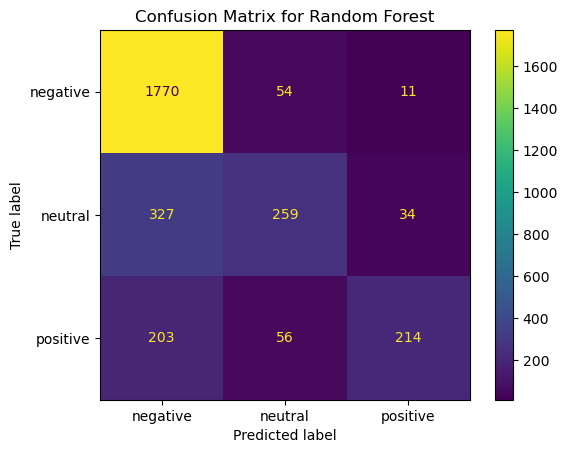

In [49]:
# Displaying the Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred, labels=rf_model.classes_)
plt.figure(figsize=(8, 8))
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=rf_model.classes_)
rf_disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix for Random Forest")
plt.show()